# Контекстуализированные эмбеддинги

## 🐴 рабочая лошадь современной компьютерной лингвистики (с 2018 года)

До сих пор мы с вами говорили о **"статических" моделях** (‘static word embeddings’). И word2vec, и fastText и GloVe — статические модели. Т.е. в них **один раз обучается набор эмбеддингов** для каких-то текстовых единиц (слово или часть слова... условно назовем это токеном). И дальше мы работаем с таблицей эмбеддингов. 

У такого подхода есть очевидные **проблемы**: например, **полисемия**. Скорее всего, на этапе обучения мы смешаем разные значения слова в один вектор — и дальше всегда будем пихать именно его. В идеале нужно, чтобы эмбеддинг слова "мышь" частично зависел от того, как в принципе употребляется слово, но частично — и от текущего контекста. 

<img src='http://ai.stanford.edu/blog/assets/img/posts/2020-03-24-contextual/contextual_mouse_transparent_1.png'>

В районе 2018-2019 произошел бум т.н. "контекстуализированных" моделей: ELMo, BERT, GPT-3, которые реализуют этот подход. В них эмбеддинг каждого слова зависит еще и от контекста, в котором оно употреблено. Следовательно, у нас уже нет никакой готовой единой таблицы эмбеддингов. Есть модель, которая на лету генерирует эмбеддинги каждого слова с учетом текущего контекста. 

<img src='http://ai.stanford.edu/blog/assets/img/posts/2020-03-24-contextual/contextual_mouse_transparent_2.png'>

Посмотрим [это в работе](https://rusvectores.org/ru/contextual/) на русском языке.

🚀 И это оказалось просто killer feature с точки зрения инженерии: на контекстуализированных эмбеддингах станадртные задачи NLP стали решаться гораздо лучше, чем на статических до этого!📈  BERT вообще стал универсальным швейцарским ножом* всея компьютерной лингвистики... 

**это связано не только с использвоанием контекстуализированных эмбеддингов, там сыграла свою роль удачная неросетевая архитектура Transformer, позволяющая обучить сеть на очень большом корпусе, а также наличие такового корпуса*

## Работаем  с ELMo

К сожалению, библиотека gensim не поддерживает контекстуализированные модели (т.к. они принципиально отличаются от статическийх). Поэтому делать все так же, как раньше с word2vec и fastText, не получится

Поэтому ниже мы будем генерировать контекстуализированные эмбеддинги при помощи ELMo в обертке под названием simple-elmo, которую сделал все тот же Андрей Кутузов со товарищи. 

In [ ]:
!pip3 install simple_elmo

Возьмем **модель ELMo**, обученную командой RusVectores **на НКРЯ и русской Википедии** :

In [ ]:
!wget 'http://vectors.nlpl.eu/repository/20/195.zip'

--2022-03-19 09:08:32--  http://vectors.nlpl.eu/repository/20/195.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206977027 (197M) [application/zip]
Saving to: ‘195.zip.1’

195.zip.1           100%[===================>] 197.39M  27.2MB/s    in 7.9s    

2022-03-19 09:08:41 (24.9 MB/s) - ‘195.zip.1’ saved [206977027/206977027]



In [ ]:
from simple_elmo import ElmoModel

In [ ]:
model = ElmoModel()

Распакуем модель в наш объект ElmoModel, это займет прилично времени, минуты 3 ⌛  

In [ ]:
model.load("195.zip")

2022-03-19 09:11:20,595 : INFO : Loading model from 195.zip...
2022-03-19 09:11:20,598 : INFO : 
            Assuming the model is a ZIP archive downloaded from the NLPL vector repository.
            Loading a model from a ZIP archive directly is slower than from the extracted files,
            but does not require additional disk space
            and allows to load from directories without write permissions.
            
2022-03-19 09:11:20,601 : INFO : We will cache the vocabulary of 100 tokens.
/usr/local/lib/python3.7/dist-packages/simple_elmo/model.py:531: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell_clip=cell_clip, proj_clip=proj_clip)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `l

'The model is now loaded.'

Все, мы с вами загрузили модель. **Можно кормить ей тексты** (просто в виде списков токенов). Возьмем такой небольшой набор текстов:

In [ ]:
texts = ['у нас лук растет на грядке',
         'составной лук — оружие кочевников',
         'у маши модный лук в инсте',
         'есть зеленый лук полезно для здоровья',
         'кликни мышь по всплывающему окну на экране',
         'домовая мышь очень плодовита и размножается круглый год',
         'серая мышь грызет сыр']
tokenized_texts = [text.split() for text in texts]

In [ ]:
tokenized_texts

[['у', 'нас', 'лук', 'растет', 'на', 'грядке'],
 ['составной', 'лук', '—', 'оружие', 'кочевников'],
 ['у', 'маши', 'модный', 'лук', 'в', 'инсте'],
 ['есть', 'зеленый', 'лук', 'полезно', 'для', 'здоровья'],
 ['кликни', 'мышь', 'по', 'всплывающему', 'окну', 'на', 'экране'],
 ['домовая',
  'мышь',
  'очень',
  'плодовита',
  'и',
  'размножается',
  'круглый',
  'год'],
 ['серая', 'мышь', 'грызет', 'сыр']]

In [ ]:
vectors = model.get_elmo_vectors(tokenized_texts)

2022-03-19 09:35:18,876 : INFO : Warming up ELMo on 7 sentences...
2022-03-19 09:35:20,046 : INFO : Warming up finished.
2022-03-19 09:35:20,051 : INFO : Texts in the current batch: 7


In [ ]:
vectors.shape

(7, 8, 1024)

7 - это число наших предложений, 8 - максимальное количество слов в предложении, а 1024 - это размерность ELMo-вектора для каждого слова в данной модели

In [ ]:
vectors[0][2] # эмбеддинг слова лук из первого предложения, оно третье по счету 🌰

array([ 0.35561803,  1.32152927, -0.71108752, ...,  0.72540092,
       -0.0944491 , -0.09786855])

Удостоверимся, что это он :)

In [ ]:
tokenized_texts[1] # третье слово первого предложения

['составной', 'лук', '—', 'оружие', 'кочевников']

In [ ]:
vectors[1][1] # эмбеддинг слова лук из второго предложения 🏹

array([-0.26929721,  0.99860299,  0.03584307, ...,  0.15998191,
       -0.03888339,  0.45887583])

In [ ]:
tokenized_texts[2]

['у', 'маши', 'модный', 'лук', 'в', 'инсте']

Циферки у двух луков разные, ура! Посмотрим и на третий:


In [ ]:
vectors[2][3] # эмбеддинг слова лук из третьего предложения 🤳

array([ 0.29420635,  1.11927152, -0.27903551, ...,  0.2028628 ,
       -0.19678339,  0.14220186])

NB: Здесь нам показывают не весь вектор, только начало и конец. Потому что всего в нем 1024 компонента:

In [ ]:
vectors[2][3].shape

(1024,)

Но как же их все сравнить?

In [ ]:
#





















#

<img src = 'https://github.com/dhhse/dh2020/raw/master/pics/distances.png'>

In [ ]:
from scipy import spatial # для подсчета косинусного расстояния

In [ ]:
tokenized_texts[6]

['серая', 'мышь', 'грызет', 'сыр']

In [ ]:
onion = vectors[0][2] # 🌰
onion2 = vectors[3][2] # 🌰 еще один лук-растение из 4-го предложения
bow = vectors[1][1] # 🏹
look = vectors[2][3] # 🤳


mouse_computer = vectors[4][1] # 🖱️ 
mouse_rodent = vectors[5][1] # 🐁
mouse_rodent_2 = vectors[6][1] # 🐁

In [ ]:
# смотрим расстояния
spatial.distance.cosine(onion, onion)

0.0

In [ ]:
spatial.distance.cosine(onion, bow)

0.2998322061974956

In [ ]:
spatial.distance.cosine(onion, onion2)

0.186398592087878

In [ ]:
tokenized_texts[2]

['у', 'маши', 'модный', 'лук', 'в', 'инсте']

In [ ]:
spatial.distance.cosine(onion, look)

0.1648769908973401

Ну вот, луки в одном значении ближе друг другу. В принципе это все, что нам нужно. 

In [ ]:
spatial.distance.cosine(mouse_computer,mouse_computer)

0.0

In [ ]:
spatial.distance.cosine(mouse_computer, mouse_rodent)

0.33782239754595733

In [ ]:
spatial.distance.cosine(mouse_computer, mouse_rodent_2)

0.3432023472204947

In [ ]:
spatial.distance.cosine(mouse_rodent, mouse_rodent_2)

0.1664347777387558

Мыши тоже! 

## Визуализируем это

Мы измерили расстояния между векторами в пространстве 1024 измерений. Напрямую такое визуализировать сложно. Но есть много методов понижения размерности до 2-3 измерений, что уже можно визуализировать. Воспользуемся одним из классических методов — PCA (вот [его шикарное объяснение](http://math-info.hse.ru/f/2015-16/ling-mag-quant/lecture-pca.html) от Ильи Щурова) 

In [ ]:
from sklearn.decomposition import PCA

Засунем наши данные в PCA (подсмотрено [тут](https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point), [тут](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html) и [тут](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60))

In [ ]:
pca_for_words = PCA ().fit_transform ([onion, bow, look, onion2, mouse_computer, mouse_rodent, mouse_rodent_2])

In [ ]:
pca_for_words

In [ ]:
pca_for_words[:,1]

array([-1.61402669, -0.92130545,  2.12589833,  0.52349978,  8.60525847,
       -4.2993354 , -4.41998905])

Визуализируем матплотлибом (это сейчас вникать не нужно, про матплотлиб будет отдельная пара)

In [ ]:
from matplotlib import pyplot as plt

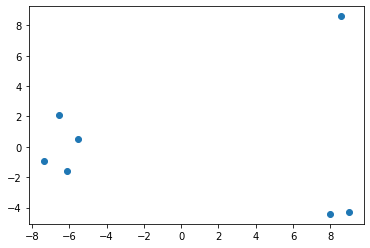

In [ ]:
plt.scatter(pca_for_words[:,0], pca_for_words[:,1])

Это расстояния между нашими словами. Хорошо бы еще подписи:

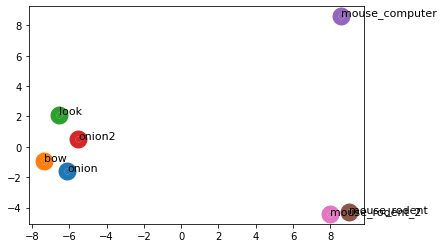

In [ ]:
selected_vectors = [onion, bow, look, onion2, mouse_computer, mouse_rodent, mouse_rodent_2]

labels = ['onion', 'bow', 'look', 'onion2', 'mouse_computer', 'mouse_rodent', 'mouse_rodent_2']

for vector_index in range (len(selected_vectors)):

    plt.scatter (pca_for_words[vector_index][0], pca_for_words[vector_index][1], linewidth=12)

    plt.text(pca_for_words[vector_index][0], pca_for_words[vector_index][1], labels[vector_index], fontsize=11 )

C мышью работает получше. На луках плохо видно расстояния -- кажется, что они все примерно близки. Но мы же знаем уже, что onion и onion2 ближе, чем onion и bow. Просто визуализация наша тоже не без проблем -- ведь тут 1024 измерения сжаты в 2. Давайте посмотрим отдельно на луки:

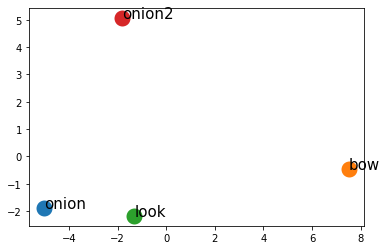

In [ ]:
selected_vectors = [onion, bow, look, onion2]
labels = ['onion', 'bow', 'look', 'onion2']

for vector_index in range (len(selected_vectors)):
  plt.scatter (pca_for_words[vector_index][2], pca_for_words[vector_index][3], linewidth=10)
  plt.text(pca_for_words[vector_index][2], pca_for_words[vector_index][3], labels[vector_index], fontsize=15)

Так чуть лучше. 

Еще продвинутые люди используют t-SNE или uMAP вместо  PCA.

## Стоп, а что там с предобработкой? Не надо ли лемматизировать? 

В западном NLP генеральный тренд — все меньше и меньше предобработки. Типа "сделайте нейронку помощнее -- и она вообще все сможет сама". 

🔎 Проверим — поменяем одинаковые формы слов на разные:

In [ ]:
texts = ['у нас лук растет на грядке',
         'составные луки — оружие кочевников',
         'у маши модный лук в инсте',
         'питаться зеленым луком полезно для здоровья',
         'кликни мышью по всплывающему окну на экране',
         'домовые мыши очень плодовиты и размножаются круглый год',
         'серая мышь грызет сыр']
tokenized_texts = [text.split() for text in texts]

In [ ]:
vectors = model.get_elmo_vectors(tokenized_texts)

2022-03-19 10:24:17,943 : INFO : Warming up ELMo on 7 sentences...
2022-03-19 10:24:18,787 : INFO : Warming up finished.
2022-03-19 10:24:18,790 : INFO : Texts in the current batch: 7


In [ ]:
onion = vectors[0][2] # 🌰
bow = vectors[1][1] # 🏹
look = vectors[2][3] # 🤳
onion2 = vectors[3][2] # 🌰 
mouse_computer = vectors[4][1] # 🖱️ 
mouse_rodent = vectors[5][1] # 🐁
mouse_rodent_2 = vectors[6][1] # 🐁

In [ ]:
# 🖱️ vs 🐁 
spatial.distance.cosine(mouse_computer, mouse_rodent)

0.5886786285387999

In [ ]:
# 🖱️ vs 🐁 
spatial.distance.cosine(mouse_computer, mouse_rodent_2)

0.6195594491455085

In [ ]:
# 🐁  vs 🐁 
spatial.distance.cosine(mouse_rodent, mouse_rodent_2)

0.39786281128502665

Вроде и так срабатывает.


In [ ]:
spatial.distance.cosine(onion, bow)

0.542996678256181

In [ ]:
spatial.distance.cosine(onion, onion2)

0.49536833364179045

Тут тоже вроде срабатывает, но хуже


## Ломаем модель

Но легко может поломаться. Особенно если слова в разных значениях стоят в одной форме:

In [ ]:
texts = ['у нас лук растет на грядке',
         'составной лук — оружие кочевников',
         'у маши модный лук в инсте',
         'питаться зеленым луком полезно для здоровья',
         'кликни мышью по всплывающему окну на экране',
         'домовые мыши очень плодовиты и размножаются круглый год',
         'серая мышь грызет сыр']
tokenized_texts = [text.split() for text in texts]

In [ ]:
vectors = model.get_elmo_vectors(tokenized_texts)

2022-03-19 10:29:34,019 : INFO : Warming up ELMo on 7 sentences...
2022-03-19 10:29:35,652 : INFO : Warming up finished.
2022-03-19 10:29:35,655 : INFO : Texts in the current batch: 7


In [ ]:
onion = vectors[0][2] # 🌰
bow = vectors[1][1] # 🏹
look = vectors[2][3] # 🤳
onion2 = vectors[3][2] # 🌰 
mouse_computer = vectors[4][1] # 🖱️ 
mouse_rodent = vectors[5][1] # 🐁
mouse_rodent_2 = vectors[6][1] # 🐁

In [ ]:
spatial.distance.cosine(onion, bow)

0.2998322061974956

In [ ]:
spatial.distance.cosine(onion, onion2)

0.49536833364179045

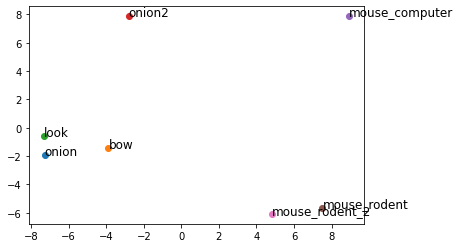

In [ ]:
pca_for_words = PCA ().fit_transform ([onion, bow, look, onion2, mouse_computer, mouse_rodent, mouse_rodent_2])
selected_vectors = [onion, bow, look, onion2, mouse_computer, mouse_rodent, mouse_rodent_2]
labels = ['onion', 'bow', 'look', 'onion2', 'mouse_computer', 'mouse_rodent', 'mouse_rodent_2']

for vector_index in range (len(selected_vectors)):
  plt.scatter (pca_for_words[vector_index][0], pca_for_words[vector_index][1])
  plt.text(pca_for_words[vector_index][0], pca_for_words[vector_index][1], labels[vector_index], fontsize=12)

Здесь против нас явно играет то, что модель обучалась на словоформах (а не на леммах) и считает, что лук и лук все-таки больше похожи, чем лук и луком, даже несмотря на контекст. 

И исследования показывают, что целом для русского языка лучше все-таки пользоваться предобработкой даже с контекстуализированными моделями (либо использовать модели, которые не со словами работают). 

Вот статья снова же Андрея Кутузова, где он показывает, что для русского лемматизация **таки нужна**: 

 [To lemmatize or not to lemmatize: how word normalisation affects ELMo performance in word sense disambiguation](https://arxiv.org/abs/1909.03135)


## Попробуем лемматизировать

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 8.2 MB 36.3 MB/s 


In [ ]:
from pymorphy2 import MorphAnalyzer
parser = MorphAnalyzer ()

2022-03-19 10:27:58,580 : INFO : Loading dictionaries from /usr/local/lib/python3.7/dist-packages/pymorphy2_dicts_ru/data
2022-03-19 10:27:58,638 : INFO : format: 2.4, revision: 417127, updated: 2020-10-11T15:05:51.070345


Напишем функцию для лемматизации — такую же, как уже использованые нами ранее в других темах

In [ ]:
def lemmatize_text (some_tokens):
  lemmatized = []
  for token in some_tokens:
    lemmatized_token = parser.parse(token)[0].normal_form
    lemmatized.append (lemmatized_token)
  return lemmatized

In [ ]:
texts = ['у нас лук растет на грядке',
         'составной лук — оружие кочевников',
         'у маши модный лук в инсте',
         'питаться зеленым луком полезно для здоровья',
         'кликни мышью по всплывающему окну на экране',
         'домовые мыши очень плодовиты и размножаются круглый год',
         'серая мышь грызет сыр']
lemmatized_texts = [lemmatize_text (text.split()) for text in texts]

In [ ]:
lemmatized_texts

[['у', 'мы', 'лук', 'расти', 'на', 'грядка'],
 ['составной', 'лук', '—', 'оружие', 'кочевник'],
 ['у', 'маша', 'модный', 'лук', 'в', 'инст'],
 ['питаться', 'зелёный', 'лук', 'полезно', 'для', 'здоровье'],
 ['кликнуть', 'мыший', 'по', 'всплывать', 'окно', 'на', 'экран'],
 ['домовый',
  'мышь',
  'очень',
  'плодовитый',
  'и',
  'размножаться',
  'круглый',
  'год'],
 ['серый', 'мышь', 'грызть', 'сыр']]

In [ ]:
vectors = model.get_elmo_vectors(lemmatized_texts)

2022-03-19 10:28:23,450 : INFO : Warming up ELMo on 7 sentences...
2022-03-19 10:28:24,338 : INFO : Warming up finished.
2022-03-19 10:28:24,341 : INFO : Texts in the current batch: 7


еще можно загрузить Elmo-модель, обученную на леммах (например, №196)

In [ ]:
onion = vectors[0][2] # 🌰
bow = vectors[1][1] # 🏹
look = vectors[2][3] # 🤳
onion2 = vectors[3][2] # 🌰 
mouse_computer = vectors[4][1] # 🖱️ 
mouse_rodent = vectors[5][1] # 🐁
mouse_rodent_2 = vectors[6][1] # 🐁

In [ ]:
spatial.distance.cosine(onion, bow)

0.31874560067579616

In [ ]:
spatial.distance.cosine(onion, onion2)

0.2951277490711077

Лук исправился, хотя еле-еле

In [ ]:
spatial.distance.cosine(mouse_computer, mouse_rodent)

0.5913917867051948

In [ ]:
spatial.distance.cosine(mouse_computer, mouse_rodent_2)

0.4919093131064951

In [ ]:
spatial.distance.cosine(mouse_rodent, mouse_rodent_2)

0.18694257747630627

А вот с мышью прям ощутимо лучше. 

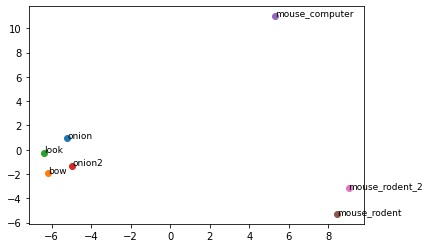

In [ ]:
pca_for_words = PCA ().fit_transform ([onion, bow, look, onion2, mouse_computer, mouse_rodent, mouse_rodent_2])
selected_vectors = [onion, bow, look, onion2, mouse_computer, mouse_rodent, mouse_rodent_2]
labels = ['onion', 'bow', 'look', 'onion2', 'mouse_computer', 'mouse_rodent', 'mouse_rodent_2']

for vector_index in range (len(selected_vectors)):
  plt.scatter (pca_for_words[vector_index][0], pca_for_words[vector_index][1])
  plt.text(pca_for_words[vector_index][0], pca_for_words[vector_index][1], labels[vector_index], fontsize=9)

## P.S.: Пробуем лемматизированную модель (не обязательно)

Кстати, кроме этой модели все [остальные](https://rusvectores.org/ru/models/) контекстуализированные модели в RusVectores — лемматизированные (т.е. обучены только на леммах, и подавать им надо лемматизированный текст). Можем воспользоваться одной из них: 

In [ ]:
!wget 'http://vectors.nlpl.eu/repository/20/196.zip'

Правда, из-за особенностей работ ELMo нам придется перезагрузить среду выполнения, чтобы загрузка новой модели сработала.

<img src='https://github.com/dhhse/dh2020/raw/master/pics/restart_env.png'>

Из-за этого придется заново импортировать все библиотеки и определять функции. Но скачанные файлы сохранились, модели перезагружать не понадобится. 

In [ ]:
from simple_elmo import ElmoModel

In [ ]:
model_lemmas = ElmoModel()

In [ ]:
model_lemmas.load("196.zip")

In [ ]:
from pymorphy2 import MorphAnalyzer
parser = MorphAnalyzer ()

In [ ]:
def lemmatize_text (some_tokens):
  lemmatized = []
  for token in some_tokens:
    lemmatized_token = parser.parse(token)[0].normal_form
    lemmatized.append (lemmatized_token)
  return lemmatized

In [ ]:
texts = ['у нас лук растет на грядке',
         'составной лук — оружие кочевников',
         'у маши модный лук в инсте',
         'питаться зеленым луком полезно для здоровья',
         'кликни мышью по всплывающему окну на экране',
         'домовые мыши очень плодовиты и размножаются круглый год',
         'серая мышь грызет сыр']
lemmatized_texts = [lemmatize_text (text.split()) for text in texts]

In [ ]:
vectors = model_lemmas.get_elmo_vectors(lemmatized_texts)

In [ ]:
onion = vectors[0][2] # 🌰
bow = vectors[1][1] # 🏹
look = vectors[2][3] # 🤳
onion2 = vectors[3][2] # 🌰 
mouse_computer = vectors[4][1] # 🖱️ 
mouse_rodent = vectors[5][1] # 🐁
mouse_rodent_2 = vectors[6][1] # 🐁

In [ ]:
from scipy import spatial

In [ ]:
spatial.distance.cosine(onion, onion)

In [ ]:
spatial.distance.cosine(onion, bow)

In [ ]:
spatial.distance.cosine(onion, onion2)

In [ ]:
spatial.distance.cosine(bow, onion2)

In [ ]:
spatial.distance.cosine(mouse_computer, mouse_rodent)

In [ ]:
spatial.distance.cosine(mouse_computer, mouse_rodent_2)

In [ ]:
spatial.distance.cosine(mouse_rodent, mouse_rodent_2)

# Как это использовать в практических задачах?

Окей, про ELMo мы поняли, а как это все использовать кроме векторной математики со словами?

Как и в случае со статическими моделями: раз мы можем превратить в вектор слово — можем и предложение, и целый текст. Дальше на таких векторах можно решать любые задачи NLP.

Для удобства для векторизации предложения в simple elmo есть специальный метод `get_elmo_vector_average()`, который генерирует средний вектор для каждого предложения. Но вы можете и сами усреднить векторы. 

А вот несколько ссылок от команды RusVectores с практическим применением ELMo:



*   [Генерация векторов слов для корпуса из файла на диске](https://github.com/ltgoslo/simple_elmo/blob/master/simple_elmo/examples/get_elmo_vectors.py)
*   [Оценка качества модели на задаче классификации текстов](https://github.com/ltgoslo/simple_elmo/blob/master/simple_elmo/examples/text_classification.py)
*   [Оценка качества модели на задаче word sense disambiguation](https://github.com/ltgoslo/simple_elmo/blob/master/simple_elmo/examples/wsd_eval.py)

